In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.signal import find_peaks
import os

plt.style.use('matplotlib.mplstyle')

DATA_DIR = 'Data/'
SAVE_DIR = 'Results/3.1/'
CASE = '2M_0.02.txt'

col_names = ['Step','t','M','LogL','LogR',
                 'LogTs','LogTc','Logrhoc','logPc','psic',
                 'Xc','Yc','XCc','XNc','XOc',
                 'taudyn','tauKH','taunuc','Lpp','LCNO',
                 'L3a','LZ','Lv','MHe','MC',
                 'MO','RHe','RC','RO']
    

col_names_structure = ['Mr','r','Lr','P','rho',
                 'T','U','S','Cp','adia1',
                 'nablaad','mu','ne','Pe','Pr',
                 'nablarad','nabla','vc','kappa','epsnuc',
                 'epspp','epscno','eps3alpha','epsvnuc','epsv', 'epsgrav',
                 'X','-','X+','Y', 'Y+', 'Y++', 'XC', 'XN', 'XO', 'Psi']




### 3.1 Radial and temporal dependence of stellar properties

#### Stellar surface and stellar core

C:\Users\amirt\AppData\Local\Temp\ipykernel_16228\2300690091.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_dir + data_name, delim_whitespace=True, header=None)


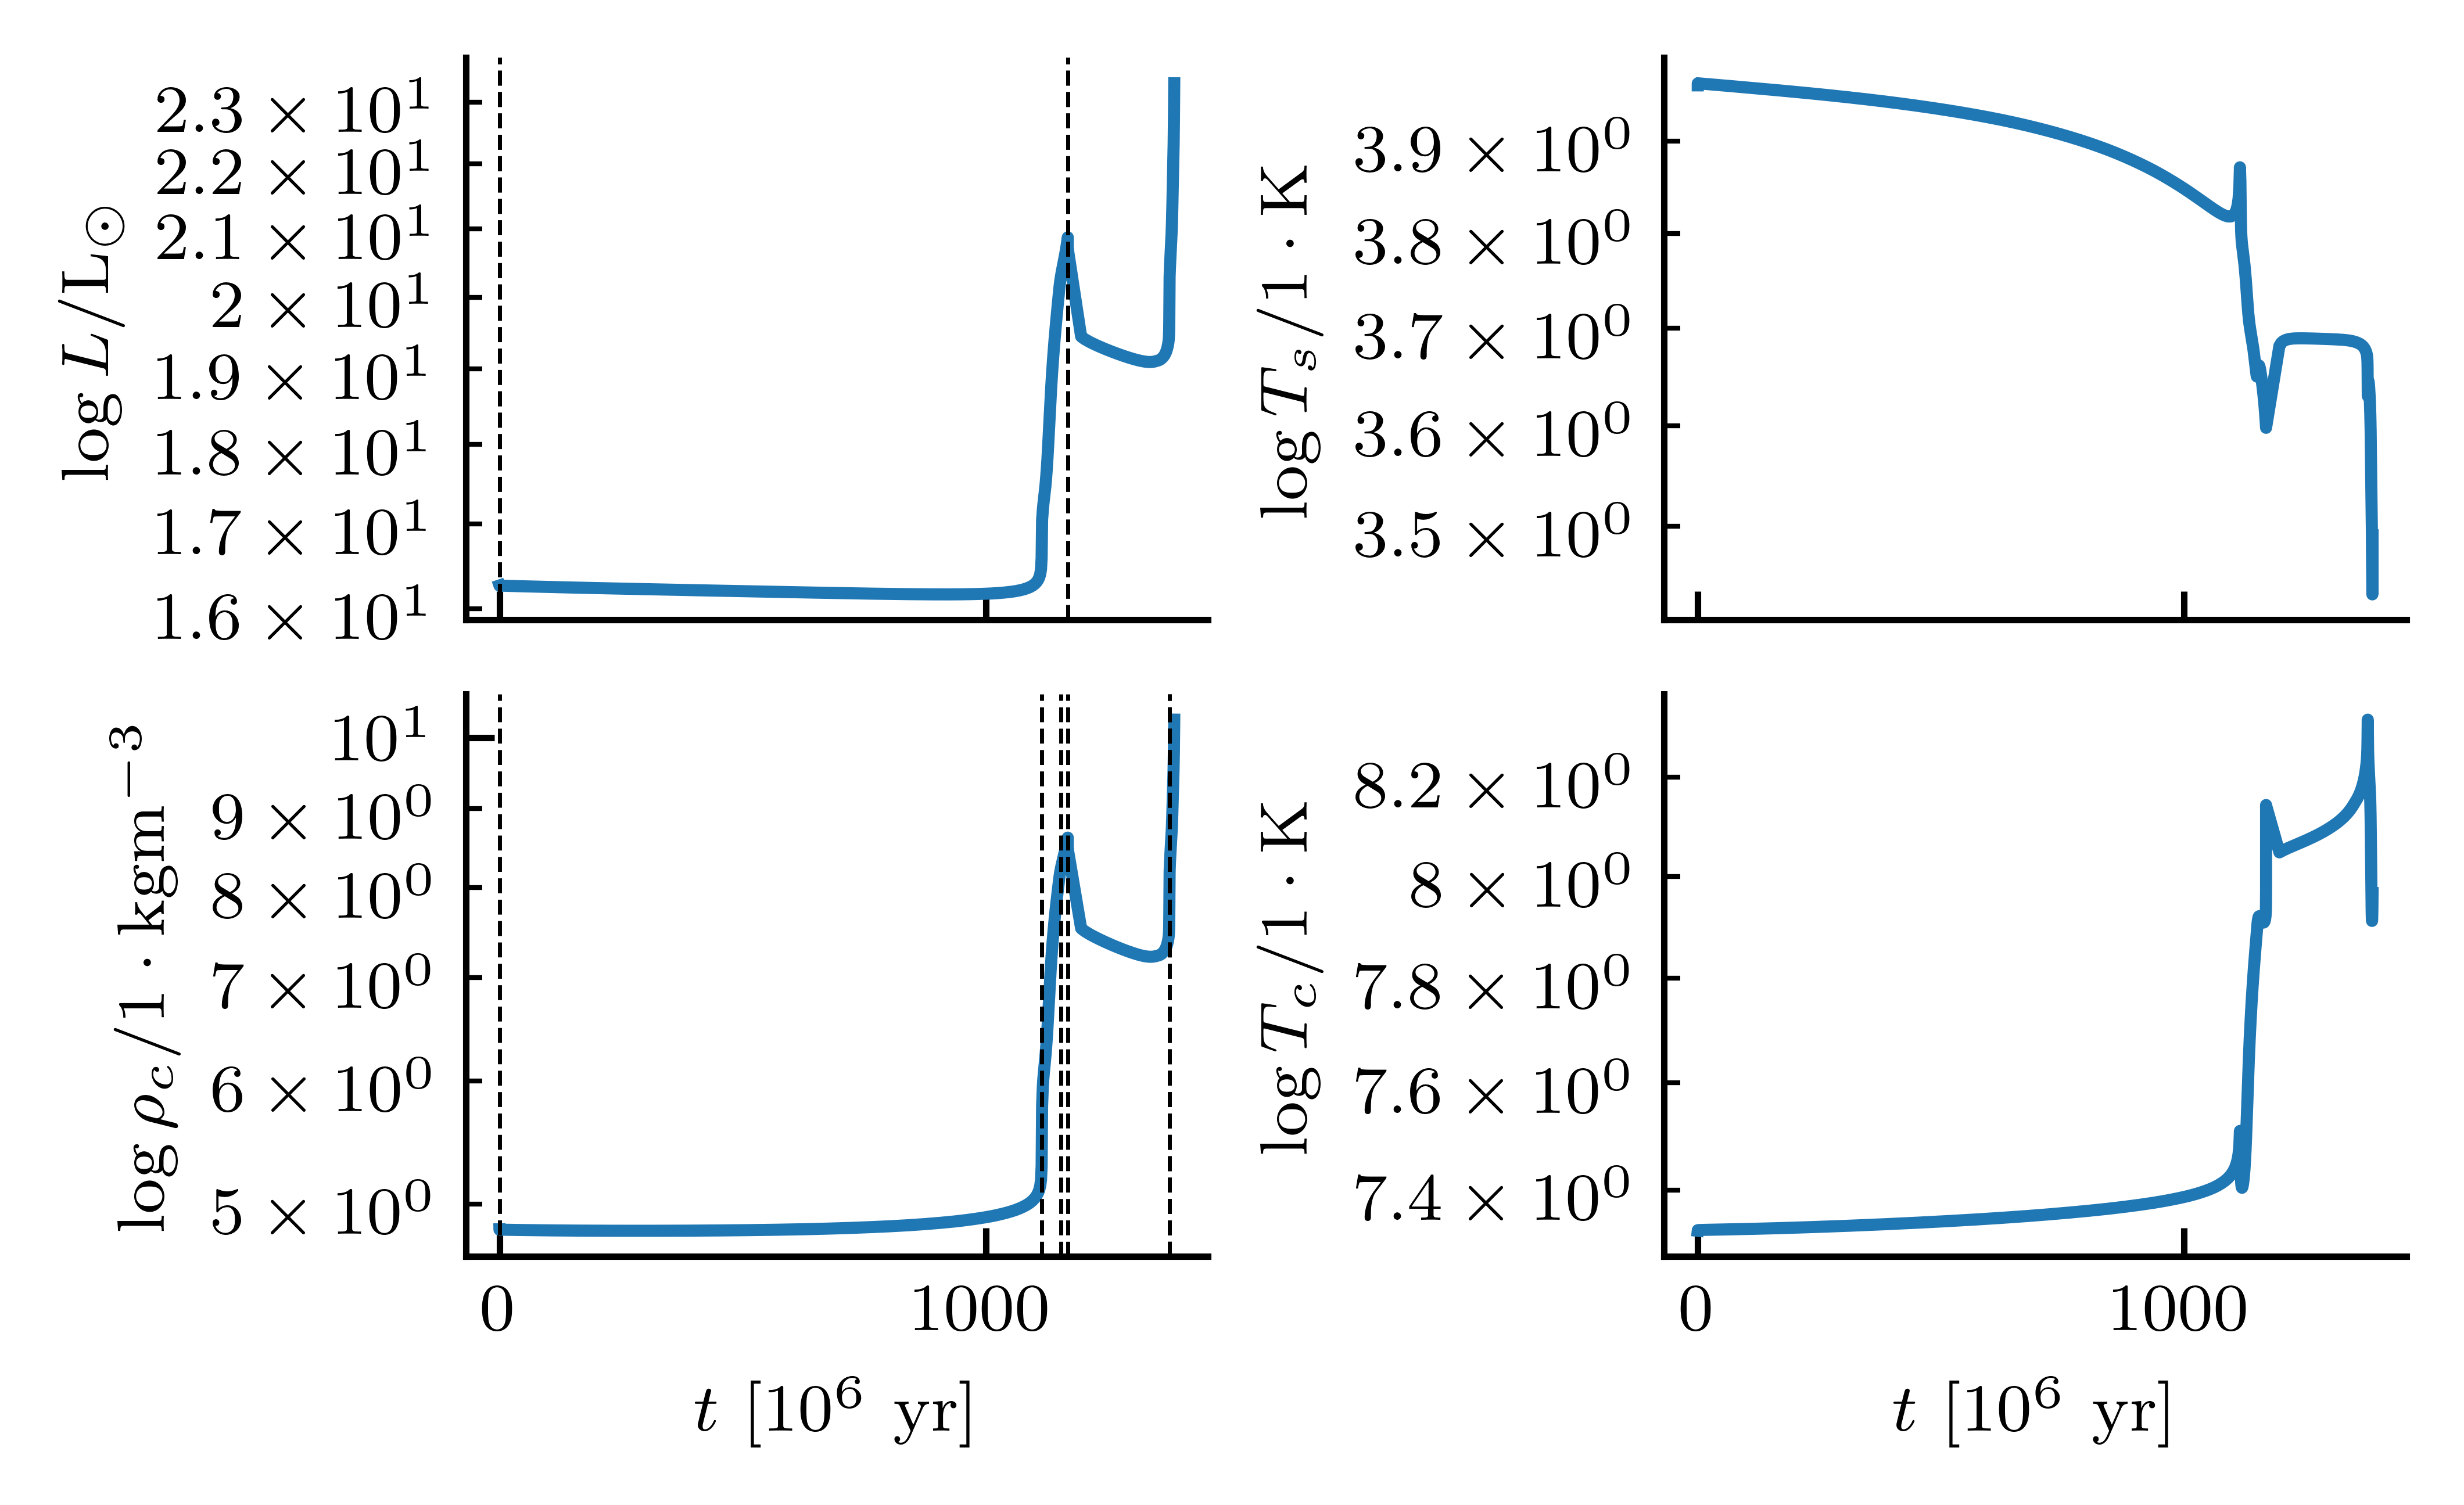

In [27]:

def plot_data(data_files, data_dir='Data/'):

    fig, axs = plt.subplots(2, 2, sharex=True)
        
    for data_name in data_files:
        df = pd.read_csv(data_dir + data_name, delim_whitespace=True, header=None)
        df.columns = col_names
        df.drop(columns=['Step'], inplace=True)

        
        axs[0, 0].semilogy(df['t'] / 1e6, df['LogL'])
        axs[0, 0].set_ylabel(r"$\log L/\mathrm{L_\odot}$")
        
        axs[0, 1].semilogy(df['t'] / 1e6, df['LogTs'])
        axs[0, 1].set_ylabel(r"$\log T_s / 1 \cdot \mathrm{K}$")
        
        axs[1, 0].semilogy(df['t'] / 1e6, df['Logrhoc'])
        axs[1, 0].set_xlabel(r"$t \ [\mathrm{10^6 \ yr}]$")
        axs[1, 0].set_ylabel(r"$\log \rho_c / \mathrm{1 \cdot kg m^{-3}}$")
        
        axs[1, 1].semilogy(df['t'] / 1e6, df['LogTc'])
        axs[1, 1].set_xlabel(r"$t \ [\mathrm{10^6 \ yr}]$")
        axs[1, 1].set_ylabel(r"$\log T_c/ 1 \cdot \mathrm{K}$")
        

        peaks_rhoc, _ = find_peaks(df['Logrhoc'], height = 5)
        
        #print(peaks_rhoc)
        
        # Print the peaks and mark them out in the plot
        #for peak_rhoc in peaks_rhoc:
        #    
        #    print(df['t'][peak_rhoc])
        #            
        #    axs[0, 0].axvline(x=df['t'][peak_rhoc] / 1e9, color='k', ls='--', lw=0.5)
        #    axs[0, 1].axvline(x=df['t'][peak_rhoc] / 1e9, color='k', ls='--', lw=0.5)
        #    axs[1, 0].axvline(x=df['t'][peak_rhoc] / 1e9, color='k', ls='--', lw=0.5)
        #    axs[1, 1].axvline(x=df['t'][peak_rhoc] / 1e9, color='k', ls='--', lw=0.5)


        #for ax in axs.flat:
            #ax.yaxis.set_minor_formatter(ScalarFormatter(useMathText=True))
            #ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            #ax.text(0.0, 1.0, r'$\times \mathrm{10^{0}}$', transform=ax.transAxes,
            #        horizontalalignment='left', verticalalignment='bottom', fontsize=8)
           # ax.grid(which='both', alpha=0.4, visible=True)
    
    name = CASE.split("_")[0]
    
    save_path = os.path.join(SAVE_DIR, f"{name}.pdf")
    plt.savefig(save_path)
    plt.show()

data_files = [CASE] 
plot_data(data_files)


C:\Users\amirt\AppData\Local\Temp\ipykernel_10356\3926034729.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(os.path.join(data_dir, data_file),


[0, Decimal('0'), Decimal('0.156208610999999997215326175137306563556194305419921875'), Decimal('0.74518073699999998193987948980065993964672088623046875')]


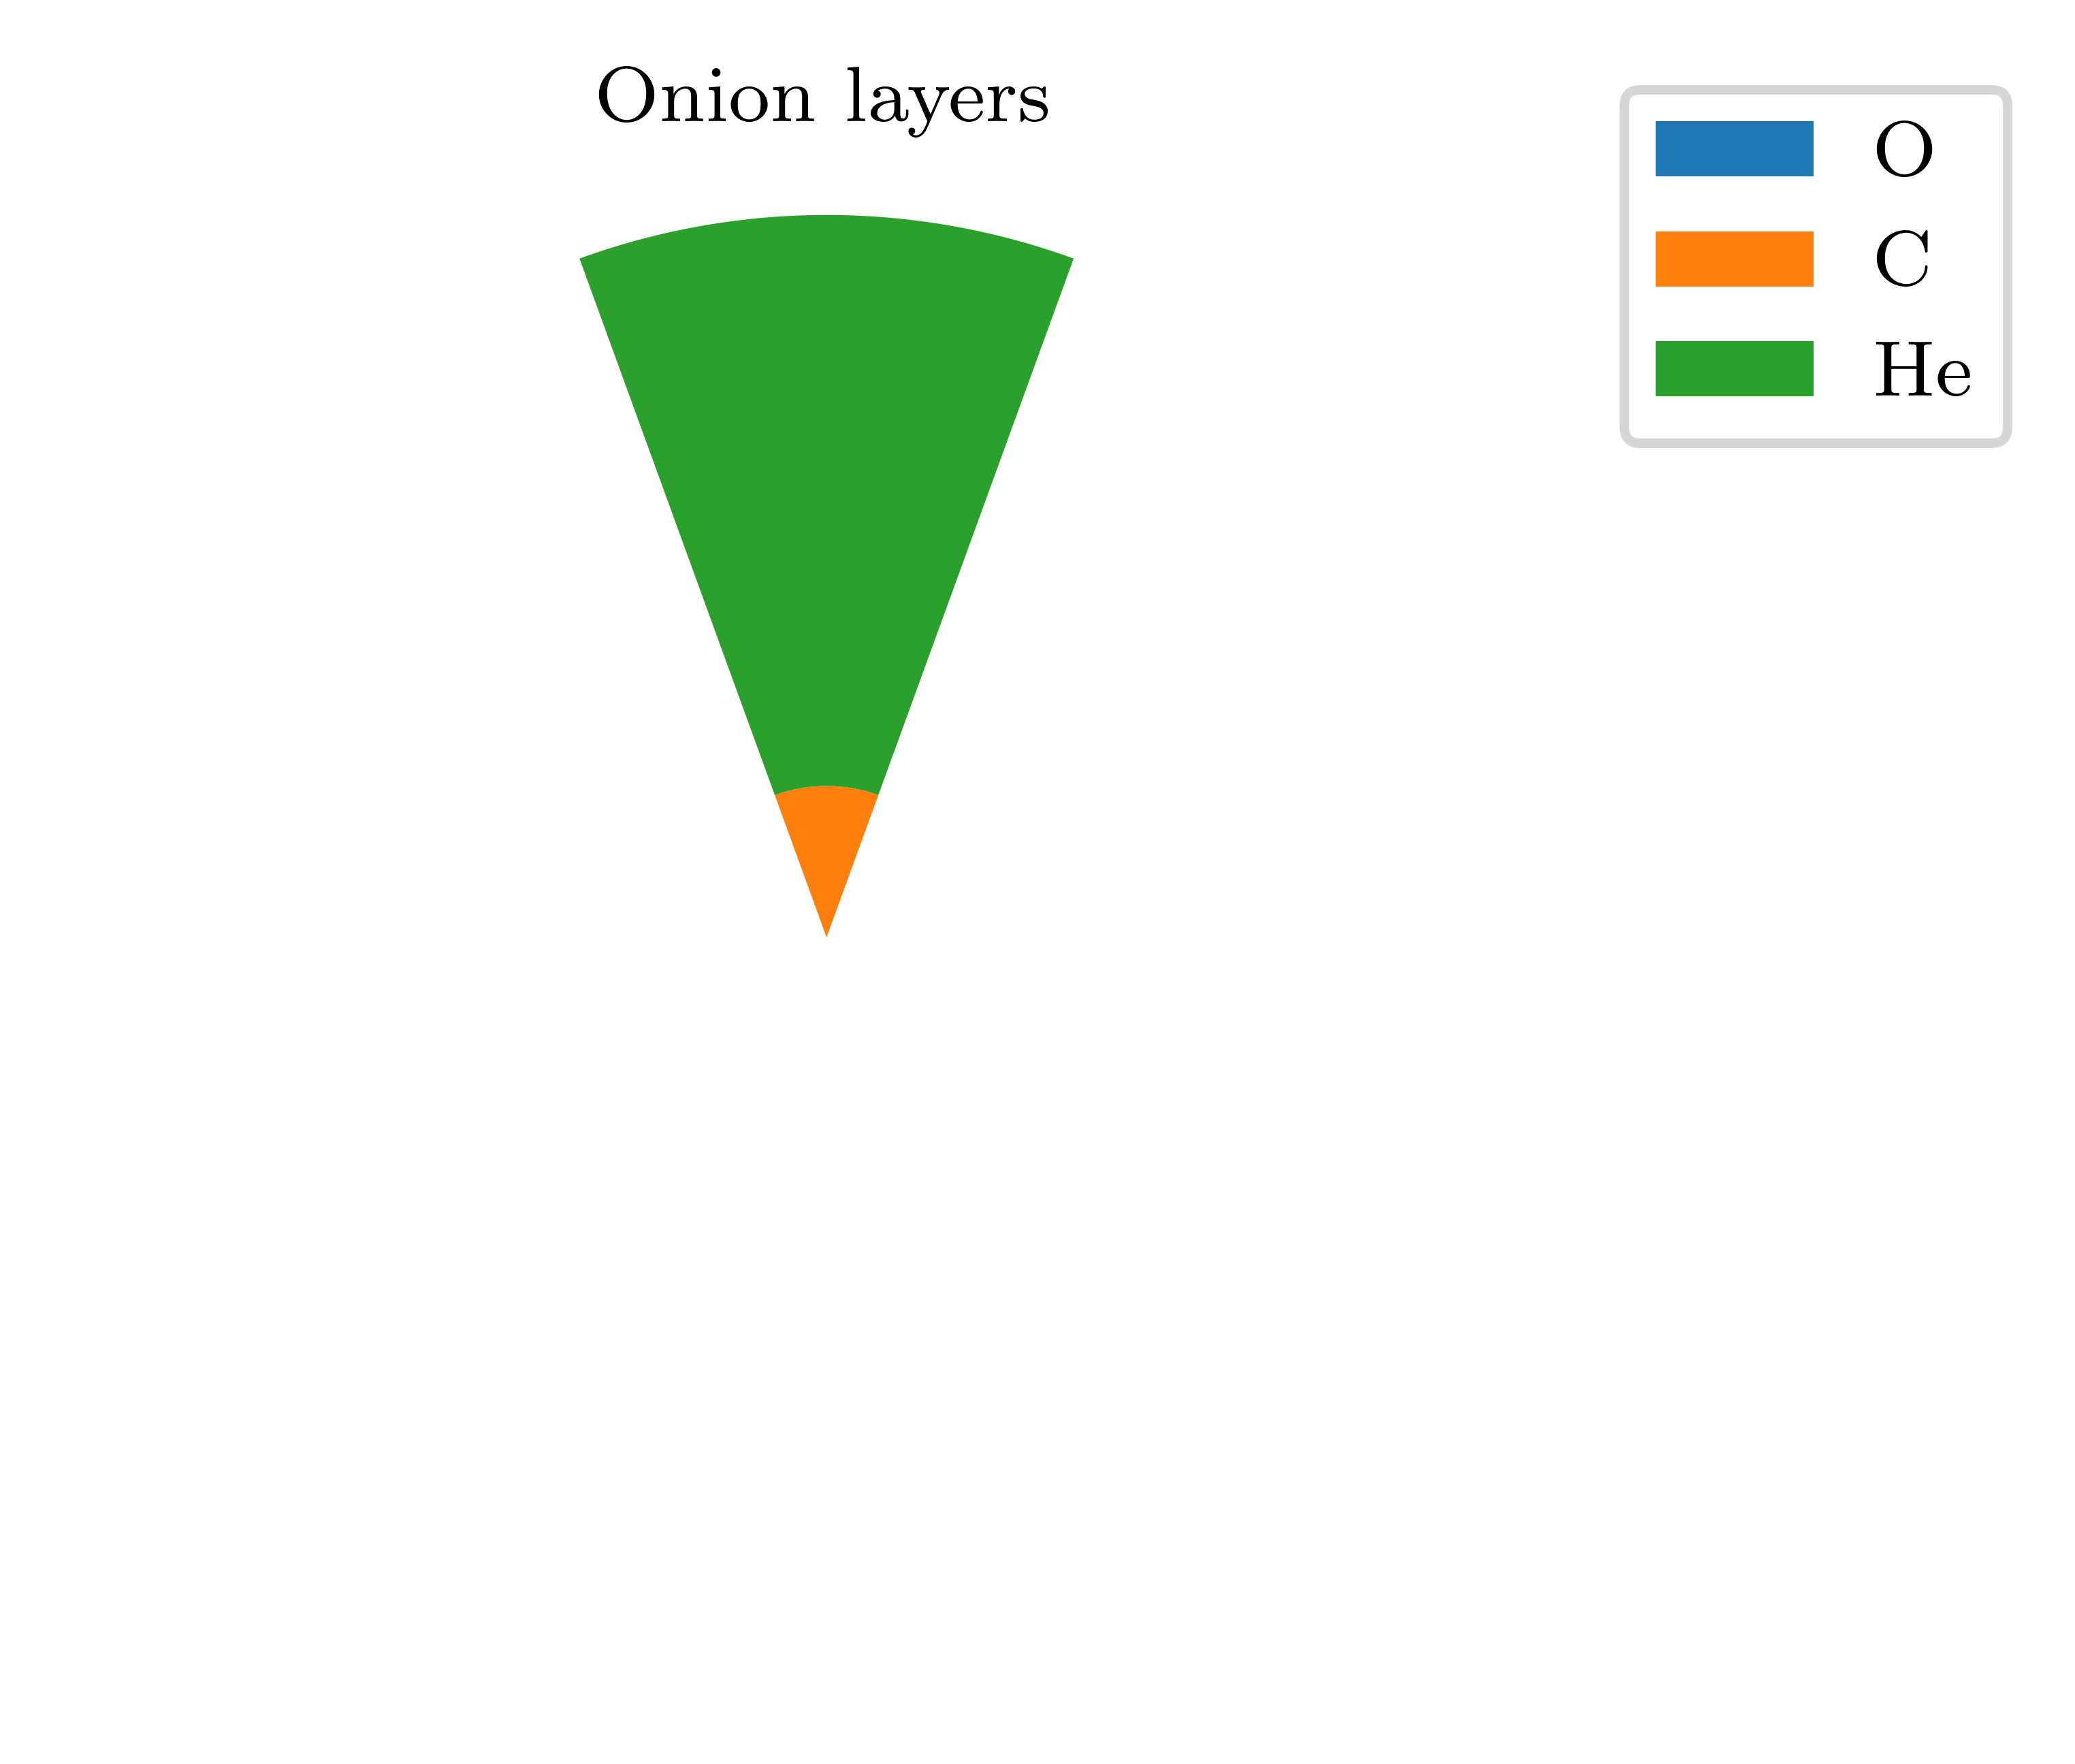

In [18]:

from decimal import Decimal


def plot_star_onion_layer(data_file, idx, data_dir='Data/', save_dir='Results/3.1/'):
 
    df = pd.read_csv(os.path.join(data_dir, data_file),
                     delim_whitespace=True, header=None)
    df.columns = col_names
    
    
    
    rHe = df['RHe'].apply(Decimal).iloc[idx]
    rC = df['RC'].apply(Decimal).iloc[idx]
    rO = df['RO'].apply(Decimal).iloc[idx]
    
    theta = np.linspace(np.radians(-20), np.radians(20), 200)
    
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    
    radii = [0, rHe, rC, rO]
    labels = [r'He', r'C', r'O']
    # order the radii list in increasing order using np sort and make sure this is correctly mapped to labels
    paired = list(zip(radii[1:], labels))
    sorted_pairs = sorted(paired, key=lambda x: x[0])
    
    sorted_radii = [0] + [r for r, _ in sorted_pairs]
    sorted_labels = [l for _, l in sorted_pairs]

    print(sorted_radii)
    for i in range(1,len(sorted_radii)):
    
        ax.fill_between(theta, sorted_radii[i-1], sorted_radii[i], alpha=1, label=sorted_labels[i-1])
    
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['polar'].set_visible(False)
    
    rmax = np.max(radii) * Decimal(1.05)
    ax.set_rmax(rmax)

    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    
    ax.set_title("Onion layers")
    ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.8))
    
    output_name = os.path.splitext(data_file)[0] + "_onion.pdf"
    plt.savefig(os.path.join(save_dir, output_name), bbox_inches='tight')
    plt.show()


CASE = '30M_0.02.txt'
plot_star_onion_layer(CASE, idx = 532, data_dir='Data/', save_dir='Results/3.1/')


### Stellar interior

- Density, temperature, hydrogen mass fraction, luminosity

In [2]:
import os

data_dir = r'c:\Users\amirt\OneDrive - Chalmers\Teknisk fysik\MSc. Physics\M1\Stellar Physics (RRY145)\Project\structure-files'

def format_data_name(data_name):
    parts = data_name.split('_')
    mass_part = parts[0].lower().replace('m', 'msun')
    decimal_part = parts[1].replace('0.', '').replace('.txt', '') 
    new_name = f"{mass_part}_{decimal_part}_SI"
    return new_name

def get_structure_files(data_dir, time_frac):
    
    df = pd.read_csv(os.path.join(DATA_DIR, CASE),
                             delim_whitespace=True, header=None)
    df.columns = col_names
            
    all_files = os.listdir(data_dir)
    structure_files = [f for f in all_files if f.startswith("structure_")]
    
    # Load first file to extract time column
    df_ref = pd.read_csv(os.path.join(data_dir, structure_files[0]), delim_whitespace=True, header=None)
    df_ref.columns = col_names_structure
    
    print(np.max(df['t']))
    
    # Find indices closest to given time fractions
    time_frac_idx = [np.argmin(np.abs(df['t'] - (t * np.max(df['t'])))) for t in time_frac]
    
    formatted_indices = [str(idx).zfill(5) for idx in time_frac_idx]
    filtered_files = [f for f in structure_files if f[10:15] in formatted_indices]
    
    return sorted(filtered_files)


def get_time_fraction(idx):
    df = pd.read_csv(os.path.join(DATA_DIR, CASE),
                             delim_whitespace=True, header=None)
    df.columns = col_names
    
    max_time = np.max(df['t']) 
    print(max_time)
    time_fractions = df['t'].iloc[idx]/max_time
    
    return time_fractions



1387608790.0


C:\Users\amirt\AppData\Local\Temp\ipykernel_16228\1252658539.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(os.path.join(DATA_DIR, CASE),


0.8321053587445205

Tidssteg

$2M_\odot$: 10, 380, 550, 982

$30M_\odot$: 10, 140, 319, 524

Fixa $L_\odot, M_\odot$ upprätt

Fix the x-label, normalized based on r_max

C:\Users\amirt\AppData\Local\Temp\ipykernel_22112\1252658539.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(os.path.join(DATA_DIR, CASE),
C:\Users\amirt\AppData\Local\Temp\ipykernel_22112\1252658539.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_ref = pd.read_csv(os.path.join(data_dir, structure_files[0]), delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_22112\168208731.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Accent", 4)
C:\Users\amirt\AppData\Local\Temp\ipykernel_22112\168208731.py:28: FutureWarning: The 'delim_whitespace' keywor

6184979.58
6184979.58
2.8697491350488826e-05
6184979.58
0.9119882397412862


C:\Users\amirt\AppData\Local\Temp\ipykernel_22112\1252658539.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(os.path.join(DATA_DIR, CASE),
C:\Users\amirt\AppData\Local\Temp\ipykernel_22112\168208731.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_22112\1252658539.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(os.path.join(DATA_DIR, CASE),
C:\Users\amirt\AppData\Local\Temp\ipykernel_22112\168208731.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instea

6184979.58
0.9139812358119378
6184979.58
0.9999888277723304


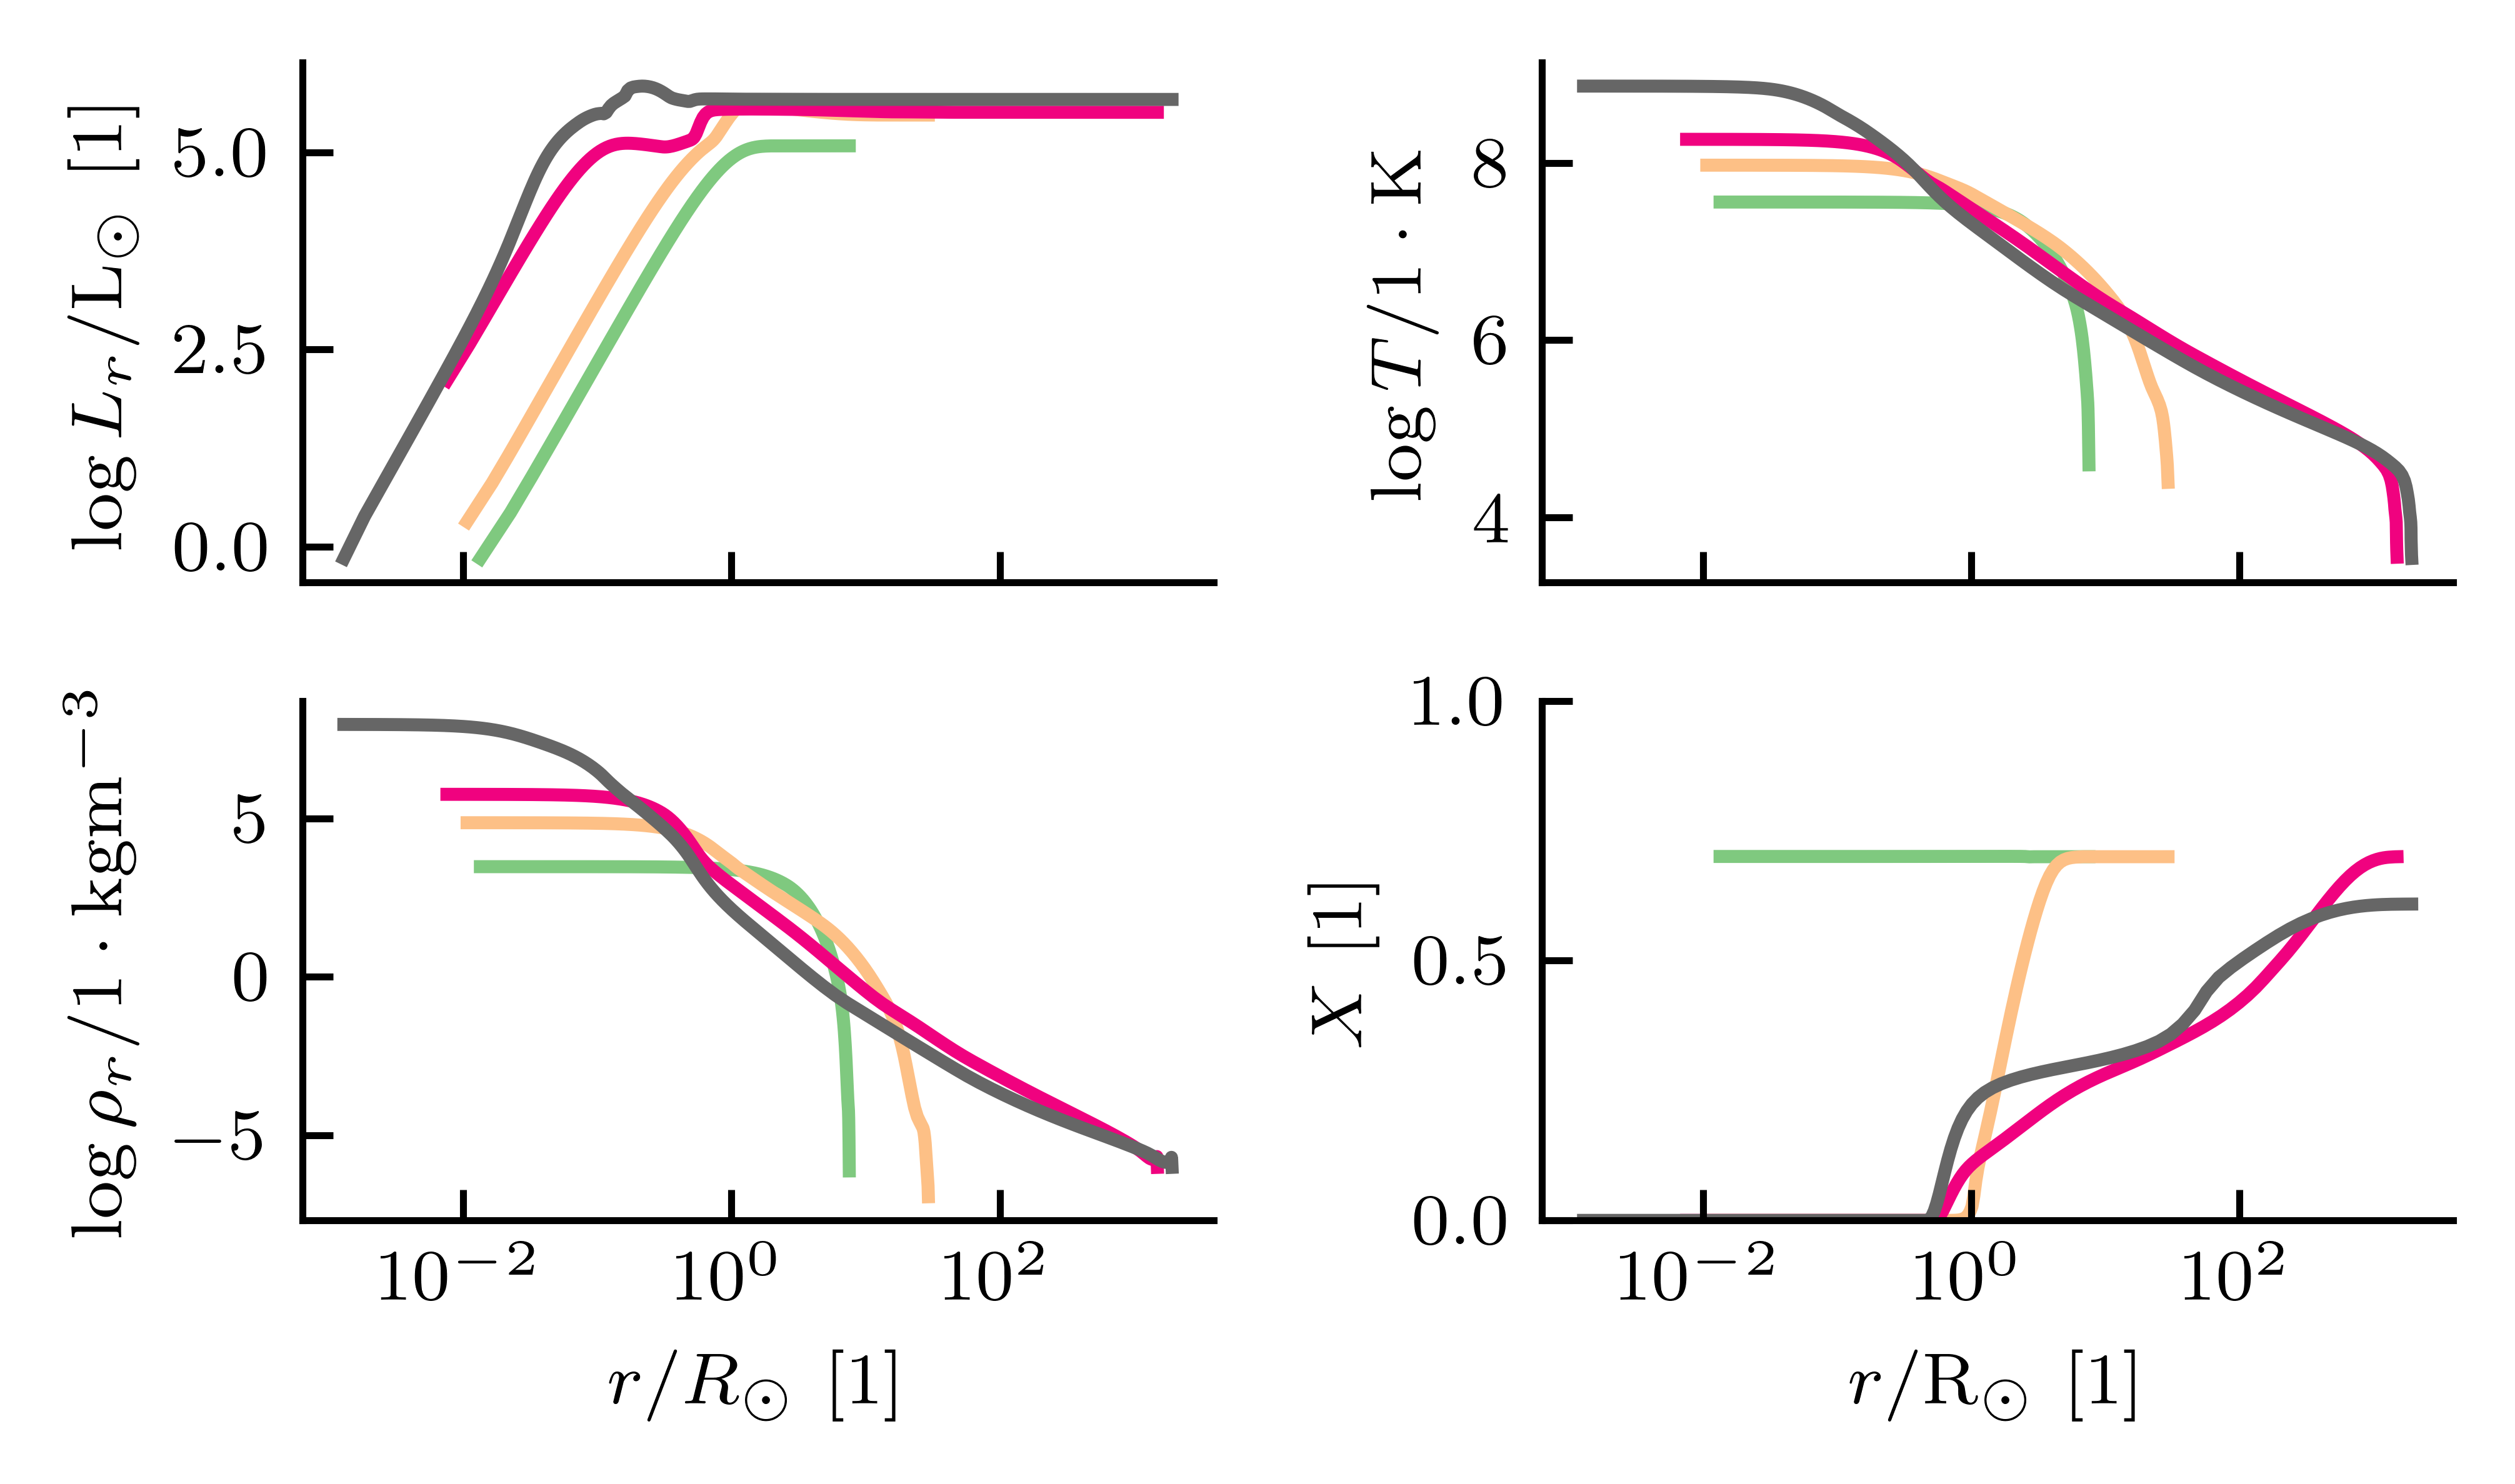

In [98]:
import matplotlib.ticker as ticker
import matplotlib.colors as colors

def plot_data(data_files, data_dir, time_fracs):

    fig, axs = plt.subplots(2, 2, sharex=True, constrained_layout=False)
    cmap = cm.get_cmap("Accent", 4)
    norm = colors.BoundaryNorm(boundaries = [0, 0.91, 0.913, 0.95, 1], ncolors = 4)
    
    data_names_2M = ['structure_00010.txt', 'structure_00380.txt', 'structure_00550.txt', 'structure_00984.txt']
    data_names_30M = ['structure_00010.txt', 'structure_00140.txt', 'structure_00319.txt', 'structure_00524.txt']
    
    plt.xscale('log')
    #plt.yscale('log')
    
    
    if CASE == '2M_0.02.txt':
        data_names = data_names_2M
    else:
        data_names = data_names_30M
        
    for data_name, in zip(data_names):
        
        file_path = os.path.join(data_dir, data_name)
    

        
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        df.columns = col_names_structure
        
        r = df['r']
        
        

        idx = int(data_name[10:15]) - 1
        f = get_time_fraction(idx)
        
        print(f)
        
        color = cmap(norm(f)) 
        
        axs[0, 0].plot(r,np.log10( df['Lr']), color = color, zorder = 1)
        axs[0, 0].set_ylabel(r"$ \log L_r/\mathrm{L_\odot}$ [1]")
        
        axs[0, 1].plot(r, np.log10(df['T']), color = color, zorder = 1)
        axs[0, 1].set_ylabel(r"$\log  T / 1 \cdot \mathrm{K}$")
        
        axs[1, 0].plot(r, np.log10(df['rho']), color = color, zorder = 1)
        axs[1, 0].set_xlabel(r"$r/R_\odot$ [1]")
        axs[1, 0].set_ylabel(r"$\log  \rho_r / \mathrm{1 \cdot kg m^{-3}}$")
        
        axs[1, 1].plot(r, df['X'], color = color, zorder = 1)
        axs[1,1].set_ylim(0,1)
       # axs[1,1].set_xlim(1e-2,1)
        axs[1, 1].set_xlabel(r"$r/\mathrm{R_\odot}$ [1]")
        axs[1, 1].set_ylabel(r"$X$ [1]")
        
        # For plotting XC
        #axs[1, 1].semilogx(r, df['XC'], color = 'red')
        #axs[1,1].set_ylim(0,1)
        #axs[1, 1].set_xlabel(r"$r/R_\odot$ [1]")
        #axs[1, 1].set_ylabel(r"$X_C$ [1]")
        
    #cbar_ax = fig.add_axes([1., 0.2, 0.03, 0.7])  
    #cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend = "both", aspect = 0.8)
    #cbar.set_label(r'$t/t_\mathrm{end}$')

    name = CASE.split("_")[0]
    
    save_path = os.path.join(SAVE_DIR, f"{name}_interior.pdf")
    
    for i, ax in enumerate(axs.flat):
        ax.yaxis.set_minor_formatter(ticker.ScalarFormatter(useMathText=True))
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    
        

    plt.tight_layout()
        
    plt.savefig(save_path, bbox_inches = 'tight')
    plt.show()
        
res = format_data_name(CASE)
full_path = os.path.join(data_dir, res)

time_frac =  [0.0005, 0.2, 0.7, 0.842, 1]
data_files = get_structure_files(full_path, time_frac)
plot_data(data_files, full_path, time_frac)


### Animating radial profiles

C:\Users\amirt\AppData\Local\Temp\ipykernel_16228\1252658539.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(os.path.join(DATA_DIR, CASE),
C:\Users\amirt\AppData\Local\Temp\ipykernel_16228\1252658539.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_ref = pd.read_csv(os.path.join(data_dir, structure_files[0]), delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_16228\2993677888.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_16228\2993677888.py:45: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


1387608790.0


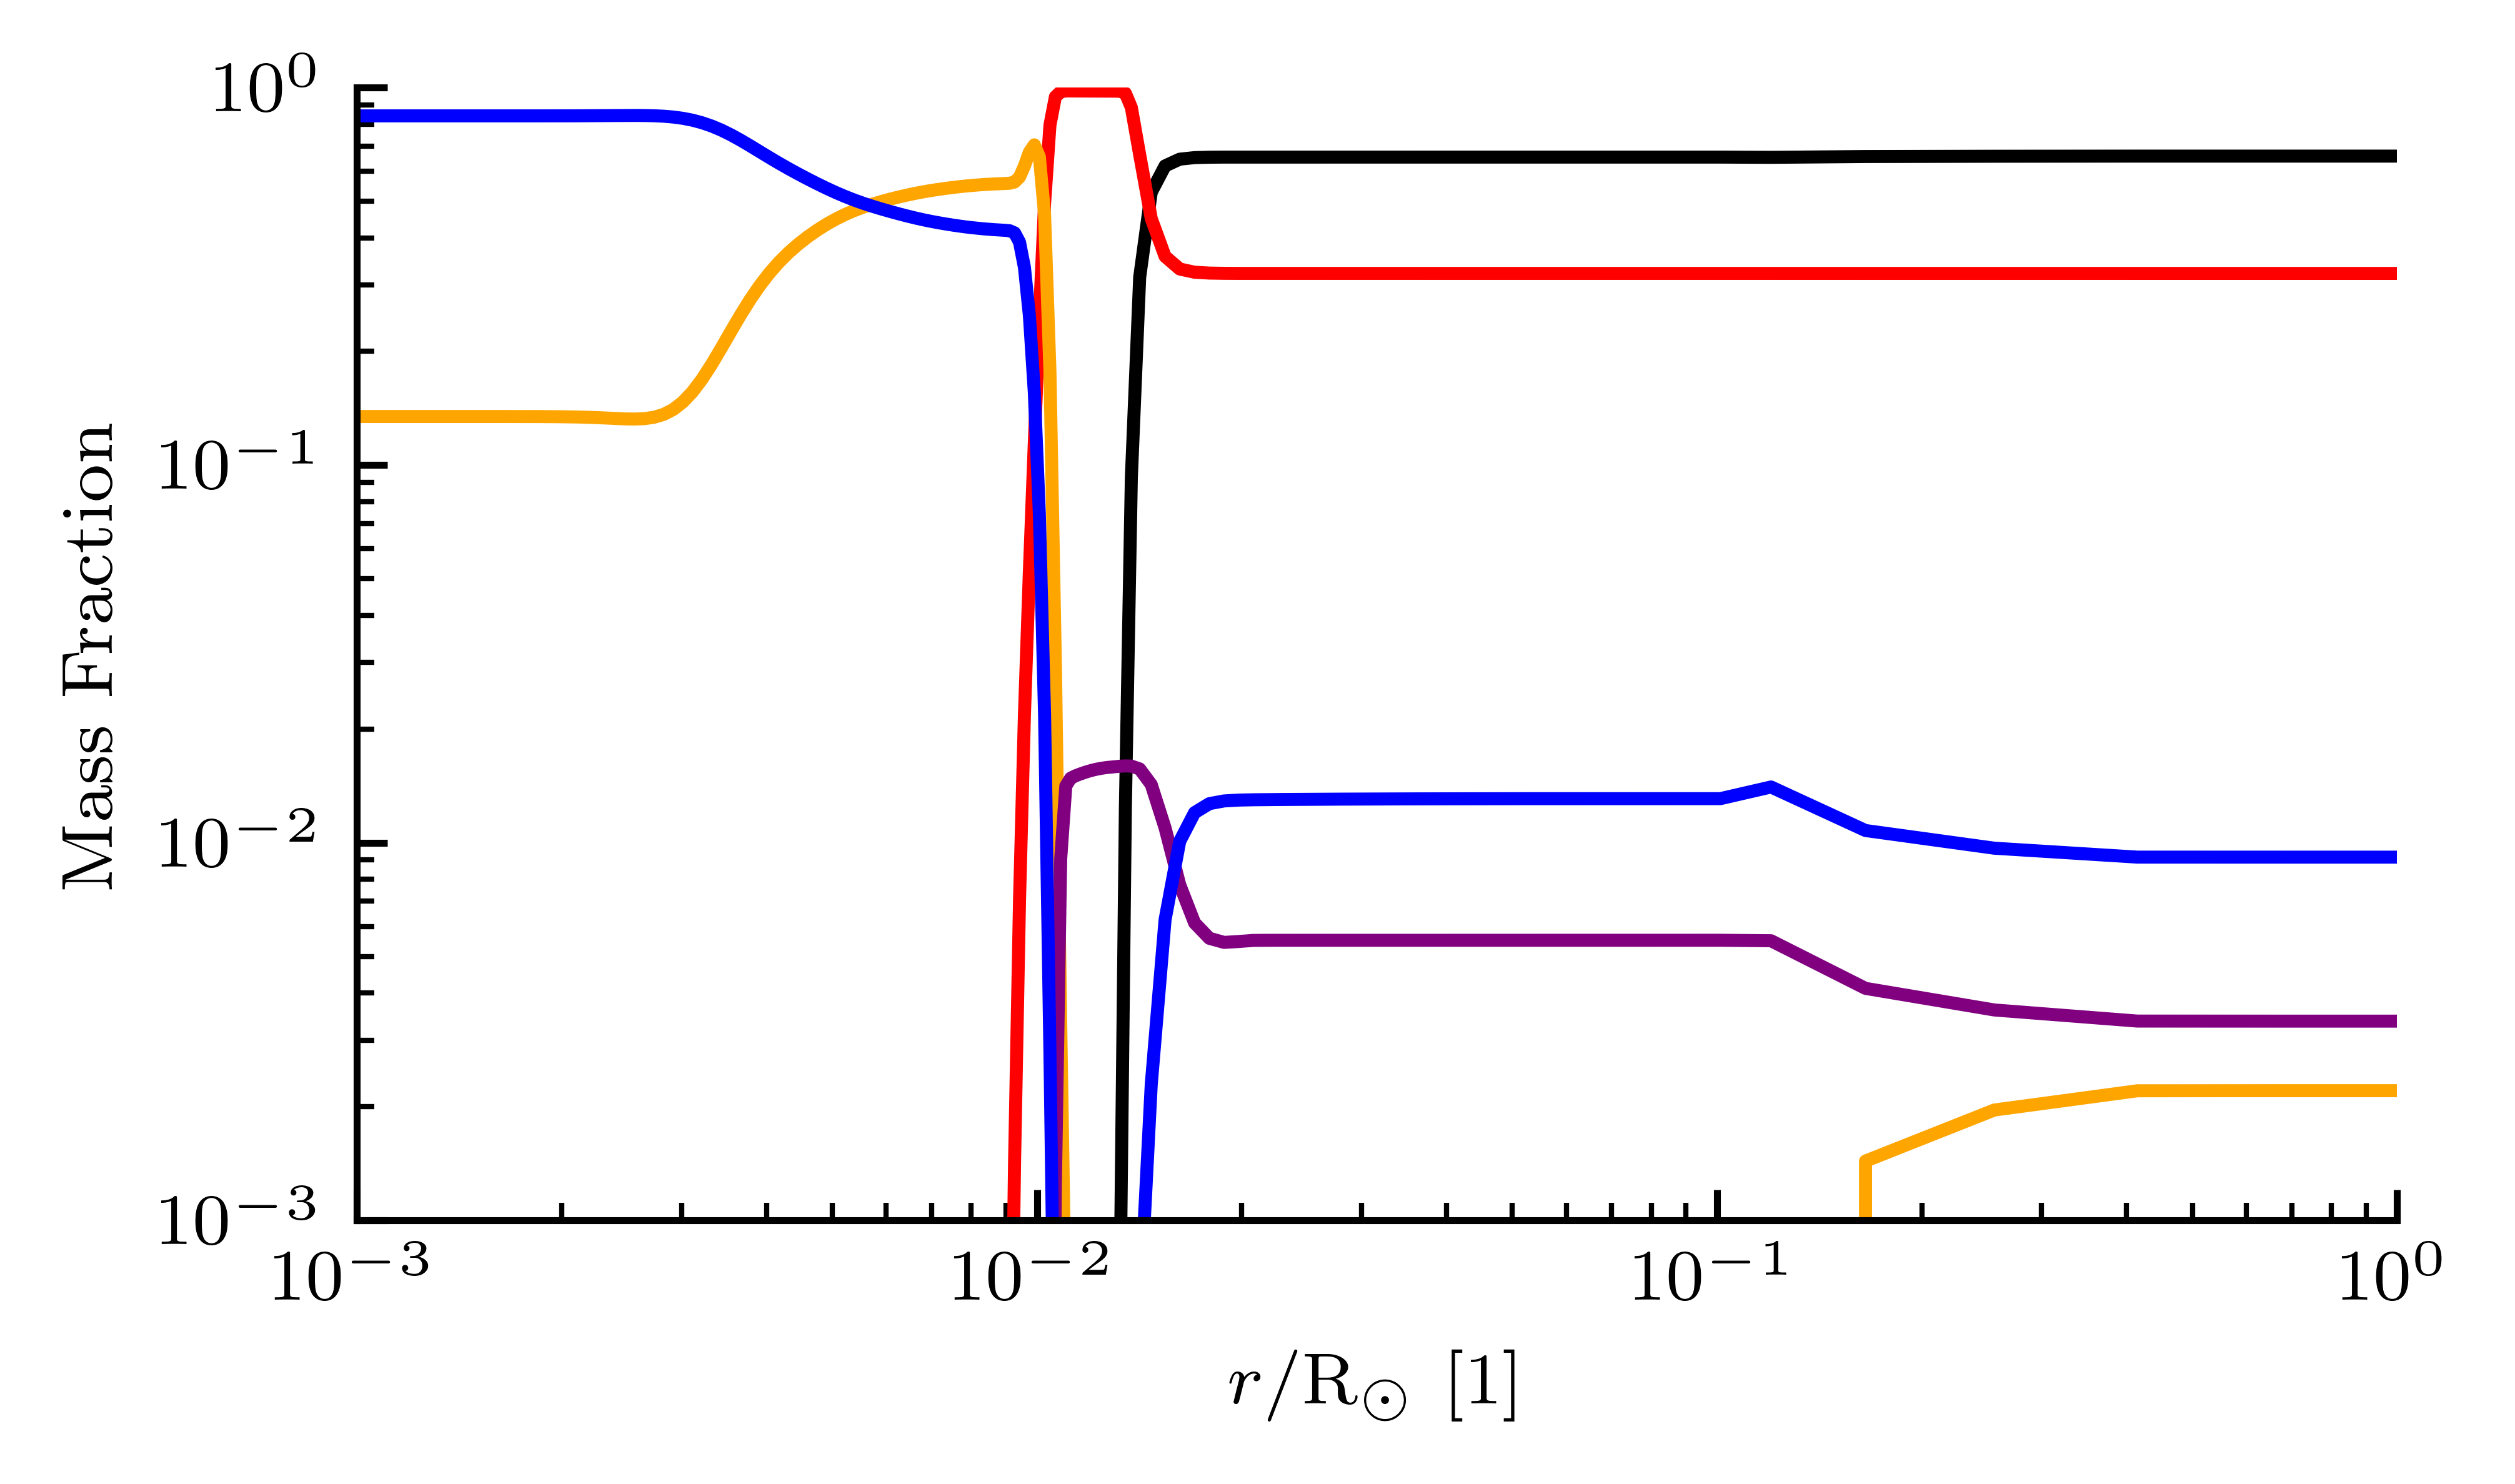

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

def plot_composition_over_radius(data_files, data_dir, time_fracs):

    composition_colors = {
        'X': ['black', r'$X$'],    # Hydrogen
        'Y': ['red', r'$Y$'],  # Helium
        'XC': ['orange', r'$X_C$'],  # Carbon
        'XN': ['purple', r'$X_N$'],# Nitrogen
        'XO': ['blue', r'$X_O$']    # Oxygen
    }

    fig, ax = plt.subplots()
    cmap = cm.copper
    norm = Normalize(vmin=0, vmax=1)

    for data_name, f in zip(data_files, time_fracs):
        file_path = os.path.join(data_dir, data_name)

        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        df.columns = col_names_structure 

        r = df['r']

        for element, (element_color, element_label) in composition_colors.items():
            if element_color == 'black':
                ax.semilogx(r, df[element], color=element_color, alpha=1)
                #ax.text(r.iloc[-1], df[element].iloc[-1]*1.15, element_label, color=element_color)
            
            
            elif element in df.columns:
                ax.semilogx(r, df[element], color=element_color, alpha=1)
                #ax.text(r.iloc[-1], df[element].iloc[-1]*1.15, element_label, color=element_color)
    ax.set_xlabel(r"$r/\mathrm{R_\odot}$ [1]")
    ax.set_ylabel("Mass Fraction")
    ax.set_ylim(1e-3, 1)
    ax.set_xlim(1e-3,1)

    plt.yscale('log')
    plt.tight_layout()
    plt.savefig(r"2M_0.9.pdf")
    plt.show()
res = format_data_name(CASE)
full_path = os.path.join(data_dir, res)
time_frac =  [1]
data_files = get_structure_files(full_path, time_frac)
plot_composition_over_radius(data_files, full_path, time_frac)


In [ ]:
import matplotlib.animation as animation


def animate_radial_X_logscale(data_files, data_dir, time_fracs, output_gif):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))
    cmap = cm.copper
    norm = Normalize(vmin=0, vmax=1)

    data_list = []
    for data_name in data_files:
        file_path = os.path.join(data_dir, data_name)
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        df.columns = col_names_structure

        r = df['r'] / df['r'].max()  
        r = np.where(r == 0, 1e-6, r) 
        X = df['X']
        data_list.append((r, X))
        
    theta = np.linspace(0, 2 * np.pi, 200)  

    def update(frame):
        ax.clear()
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title(fr"$t/t_\mathrm{{end}} = {time_fracs[frame]:.2f}$")

        r, X = data_list[frame]
        R, T = np.meshgrid(r, theta, indexing='ij')
        X_interp = np.tile(X.to_numpy()[:, np.newaxis], (1, theta.size))

        ax.set_yscale('log')
        ax.set_ylim(1e-2, 1)  

        ax.contourf(T, R, X_interp, levels=10, cmap=cmap, norm=norm)

    ani = animation.FuncAnimation(fig, update, frames=len(time_frac), interval=200, repeat=True)
    ani.save(output_gif, writer=animation.PillowWriter(fps=5))
    plt.show()

res = format_data_name(CASE)
full_path = os.path.join(data_dir, res)

time_frac = np.linspace(0, 1, 100)  
data_files = get_structure_files(full_path, time_frac)
gif_name = CASE.split("_")[0]

output_path = os.path.join(SAVE_DIR, f"{gif_name}_X_interior.gif")
animate_radial_X_logscale(data_files, full_path, time_frac, output_gif=output_path)


### Finding timestamp at which hydrogen burning is over

We will run a minimization problem for the time fraction for which we find that X is close to 0 for small radii. 

In [ ]:
from scipy.optimize import minimize_scalar

res = format_data_name(CASE)
full_path = os.path.join(data_dir, res)

def load_X_data(time_frac):
    file_name = get_structure_files(full_path, [time_frac])[0]
    temp_path = os.path.join(full_path, '')
    file_path = os.path.join(temp_path, file_name)
    print(file_path)
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)
    df.columns = col_names_structure
    return df['r'], df['X']

def constraint(time_frac, max_radius, threshold, data_dir):
    r, X_vals = load_X_data(time_frac)
    valid_indices = r <= max_radius
    return max(X_vals[valid_indices]) - threshold if any(valid_indices) else np.inf

def find_optimal_time_frac(max_radius, threshold, data_dir):
    result = minimize_scalar(lambda tf: abs(constraint(tf, max_radius, threshold, data_dir)),
                             bounds=(0, 1), method='bounded')
    return result.x if result.success else None

max_radius = 0.1
threshold = 0.01
optimal_time_frac = find_optimal_time_frac(max_radius, threshold, data_dir)


In [ ]:
print(f"optimal_time_frac = {optimal_time_frac}")

optimal_time_frac = 0.7979027632754584


### Animation for slides

C:\Users\amirt\AppData\Local\Temp\ipykernel_1516\3622640542.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(os.path.join(DATA_DIR, CASE),
C:\Users\amirt\AppData\Local\Temp\ipykernel_1516\3622640542.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_ref = pd.read_csv(os.path.join(data_dir, structure_files[0]), delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_1516\3415510158.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\amirt\AppData\Local\Temp\ipykernel_1516\3415510158.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be r

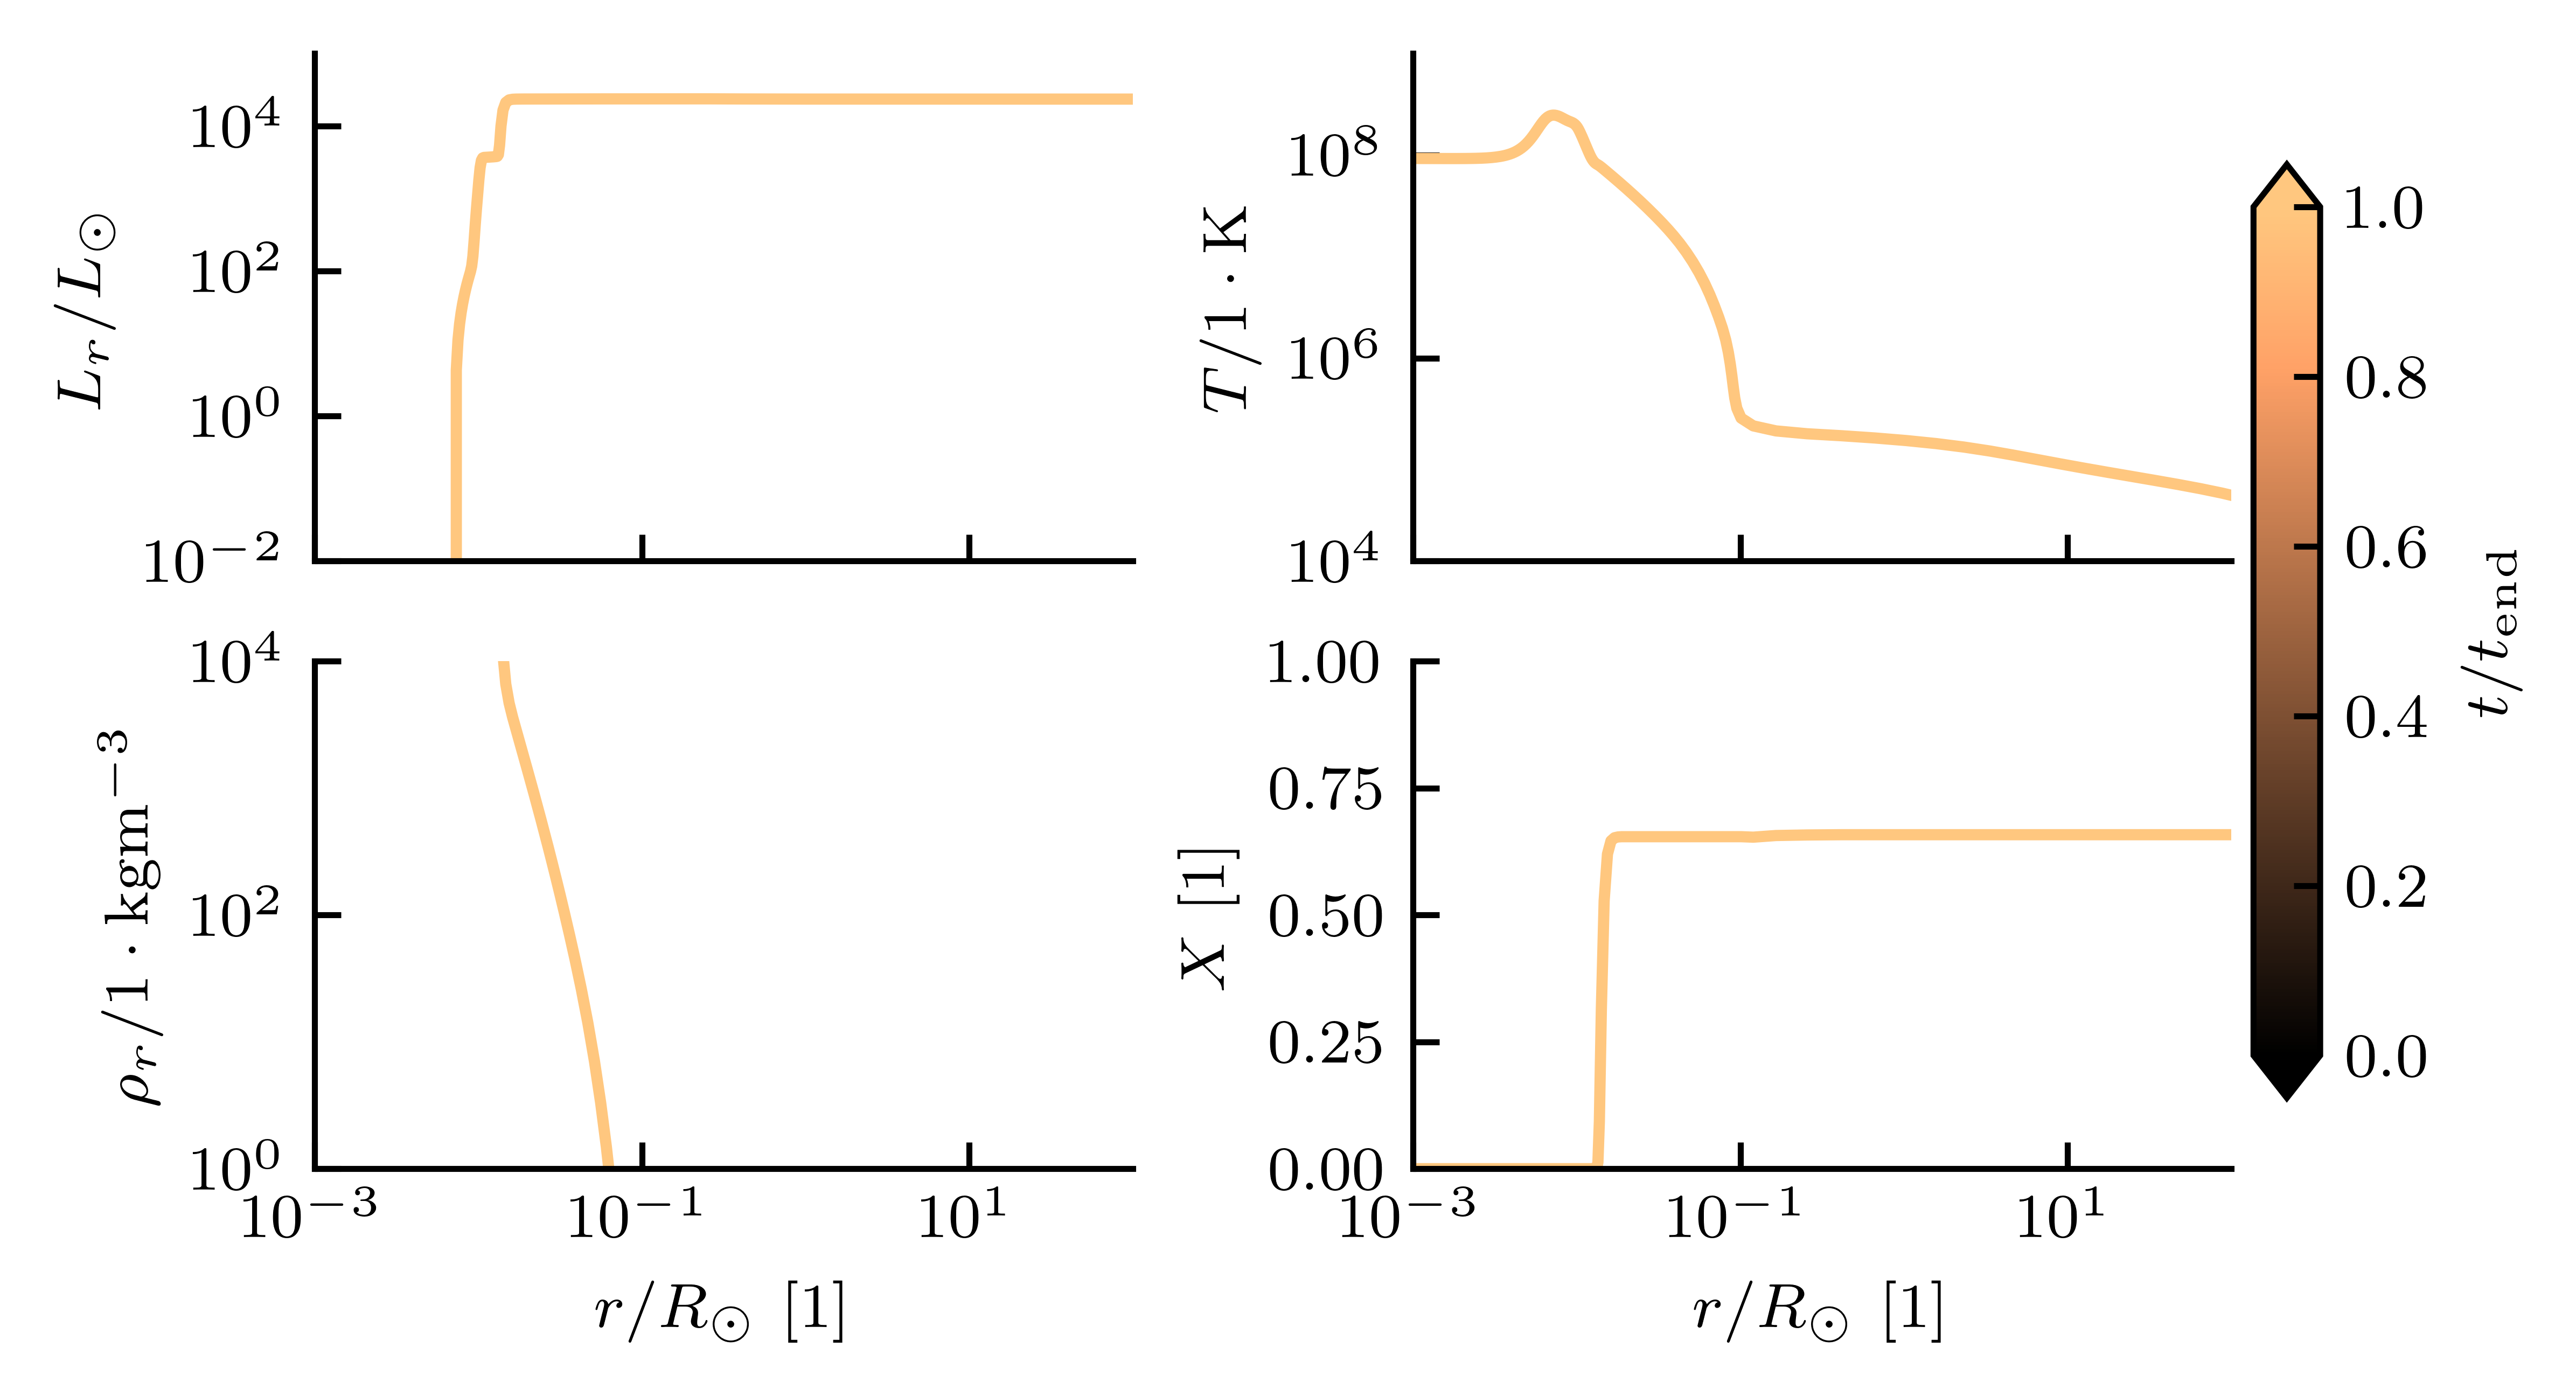

In [ ]:
import matplotlib.animation as animation

def animate_stellar_interior(data_files, data_dir, time_fracs, output_gif):
    fig, axs = plt.subplots(2, 2, sharex=True)
    cmap = cm.copper
    norm = Normalize(vmin=0, vmax=1)
    
    cbar_ax = fig.add_axes([1.0, 0.2, 0.03, 0.7])  
    cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend="both", aspect=0.8)
    cbar.set_label(r'$t/t_\mathrm{end}$')

    def update(frame):
        data_name = data_files[frame]
        f = time_fracs[frame]
        file_path = os.path.join(data_dir, data_name)
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        df.columns = col_names_structure  
        r = df['r']
        color = cmap(norm(f))  
        
        for ax in axs.flat:
            ax.clear()
            ax.set_xlim(1e-3, 1e2) 
        
        axs[0, 0].loglog(r, df['Lr'], color=color)
        axs[0, 0].set_ylabel(r"$L_r/L_\odot$")
        axs[0, 0].set_ylim(1e-2, 1e5)
        
        axs[0, 1].loglog(r, df['T'], color=color)
        axs[0, 1].set_ylabel(r"$T / 1 \cdot \mathrm{K}$")
        axs[0, 1].set_ylim(1e4, 1e9)
        
        axs[1, 0].loglog(r, df['rho'], color=color)
        axs[1, 0].set_xlabel(r"$r/R_\odot$ [1]")
        axs[1, 0].set_ylabel(r"$\rho_r / \mathrm{1 \cdot kg m^{-3}}$")
        axs[1, 0].set_ylim(1, 1e4)
        
        axs[1, 1].semilogx(r, df['X'], color=color)
        axs[1, 1].set_xlabel(r"$r/R_\odot$ [1]")
        axs[1, 1].set_ylabel(r"$X$ [1]")
        axs[1, 1].set_ylim(0, 1)
        
        return axs
    
    ani = animation.FuncAnimation(fig, update, frames=len(data_files), interval=500, repeat=True)
    
    ani.save(output_gif, writer=animation.PillowWriter(fps=5))
    plt.show()

res = format_data_name(CASE)
full_path = os.path.join(data_dir, res)

time_frac = np.linspace(0, 1, 20)
data_files = get_structure_files(full_path, time_frac)
gif_name = CASE.split("_")[0]
animate_stellar_interior(data_files, full_path, time_frac, output_gif = os.path.join(SAVE_DIR, f"{gif_name}.gif"))
